In [6]:
import warnings

warnings.filterwarnings('ignore')

In [7]:
# Useful packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from random import seed

seed(0)

In [8]:
# Data loading

train_titanic=pd.read_csv("train.csv")

test_titanic=pd.read_csv("test.csv")

In [9]:
train_titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [10]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Data description

We have eleven variables:

    - PassengerId: Primary key that are unique for each passenger
    - Survived: feature that gives information about the status of a passenger after accident,
    (0/1)-(Died/Survived)
    - Pclass: The class that the passager was embarked
    - Name: Name of the passenger
    - Sex: gender of the passenger
    - Age : Age of passenger
    - SibSp: Number of siblings/spouse on board of titanic
    - Parch: Number of parent/children on board of titanic
    - Ticket: Ticket number
    - Fare: Price of passenger's ticket 
    - Cabin: Cabin number
    - Embarked: Port of embarkation

In [12]:
train_titanic=pd.read_csv("train_processed.csv")
test_titanic=pd.read_csv("test_processed.csv")

### Encodage des variables

In [13]:
#Train data

train_titanic['Pclass']=train_titanic['Pclass'].astype('category')

# Test data

test_titanic['Pclass']=test_titanic['Pclass'].astype('category')

In [14]:

train_titanic['Cabin_new']=train_titanic['Cabin_new'].apply(lambda x:str(x).strip()[0])

test_titanic['Cabin_new']=test_titanic['Cabin_new'].apply(lambda x:str(x).strip()[0])

In [15]:
train_titanic[train_titanic["Fare"]==35]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_new
23,1,1,male,28.0,0,0,35,S,A
55,1,1,male,65.0,0,0,35,S,C
339,0,1,male,45.0,0,0,35,S,T
351,0,1,male,23.0,0,0,35,S,C
647,1,1,male,56.0,0,0,35,C,A


In [16]:
# As there are no cabin with T in test set then to keep the same format in test and train set
# We will replace T by C that is more similar to this view based on other attributes

train_titanic['Cabin_new']=train_titanic['Cabin_new'].replace('T','C') 

In [17]:
train_titanic_numeric=pd.get_dummies(train_titanic)

test_titanic_numeric=pd.get_dummies(test_titanic)

train_titanic_numeric.shape,test_titanic_numeric.shape

((891, 20), (418, 19))

### Modelisation

In [18]:
from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [19]:
lr_model=LogisticRegression(penalty="l2",class_weight="balanced")
LDA=LinearDiscriminantAnalysis()
KNN=KNeighborsClassifier(n_neighbors=2,n_jobs=-1)

In [20]:
y=train_titanic_numeric["Survived"]
X=train_titanic_numeric.drop(columns=["Survived"])

In [21]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=.1)

In [35]:
import numpy as np

## Logistic Regression optimisation
grid={"C":np.logspace(-3,3,10), "penalty":["l1","l2","elasticnet"]}# l1 lasso l2 ridge
logreg=LogisticRegression(max_iter=10000)
grid_LR=GridSearchCV(logreg,grid,cv=10,scoring="accuracy",n_jobs=-1)

## KNN optimisation
KNN = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid_KNN = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy',n_jobs=-1)

## LDA optimisation

grid=dict()
grid['solver']=['svd', 'lsqr', 'eigen']

grid_LDA=GridSearchCV(LDA, grid, scoring='accuracy', cv=10, n_jobs=-1 )

In [41]:
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

models={"LR":grid_LR,"KNN":grid_KNN,"LDA":grid_LDA}

def initiate_dict(models):

    train_scores={}
    test_scores={}
    check={"accuracy":[],"precision":[],"recall":[],"f1_score":[]}
    for key,value in models.items():
        
        train_scores[key]=[]

        test_scores[key]=check

    return train_scores,test_scores


def sample_impact(models,X,y,test_size_range):

    
    
    for model in zip(models.keys(),models.values()):

        train_scores,test_scores=initiate_dict(models)
        
        for name,model in zip(models.keys(),model.values()):
            
            for test_size in test_size_range:

                X_temp_train,X_temp_test,y_temp_train,y_temp_test=train_test_split(X,y,test_size=test_size)

                model.fit(X_temp_train,y_temp_train)

                y_predicted=model.predict(X_temp_test)
                
                #Fitting score
                train_scores[name].append(model.score(X_temp_train,y_temp_train))
                #Accuracy
                acc=metrics.accuracy_score(y_pred=y_predicted,y_true=y_temp_test)
                test_scores[name]["accuracy"].append(acc)

                #Presicion
                precision=metrics.precision_score(y_pred=y_predicted,y_true=y_temp_test)
                test_scores[name]["precision"].append(precision)


                #Recall
                recall=metrics.recall_score(y_pred=y_predicted,y_true=y_temp_test)
                test_scores[name]["recall"].append(recall)

                #F1-Score
                f1_score_test=metrics.f1_score(y_pred=y_predicted,y_true=y_temp_test)
                test_scores[name]["f1_score"].append(f1_score_test)
            
    return train_scores,test_scores

In [42]:
train_scores,test_scores=sample_impact(models,X,y,test_size_range=[0.1,0.2,0.3,0.4])

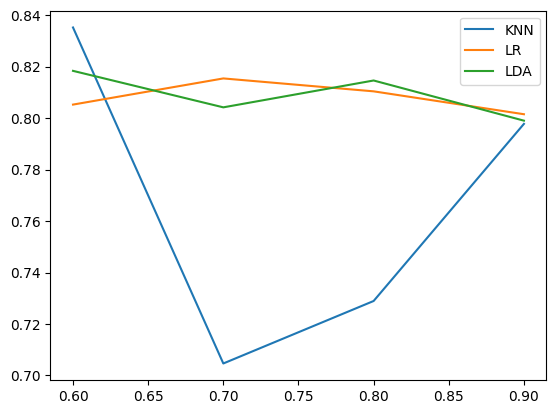

In [52]:
plt.plot(1-np.array([0.1,0.2,0.3,0.4]),train_scores["KNN"],label="KNN")
plt.plot(1-np.array([0.1,0.2,0.3,0.4]),train_scores["LR"],label="LR")
plt.plot(1-np.array([0.1,0.2,0.3,0.4]),train_scores["LDA"],label="LDA")
plt.legend()
plt.show()

In [55]:
len(test_scores["KNN"]["accuracy"])

12

ValueError: x and y must have same first dimension, but have shapes (4,) and (12,)

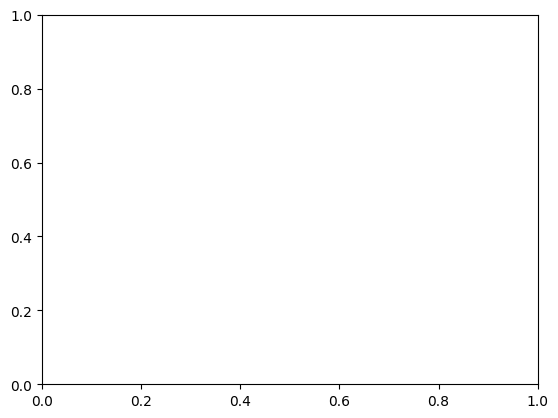

In [53]:
plt.plot(np.array([0.1,0.2,0.3,0.4]),test_scores["KNN"]["accuracy"],label="Accuracy")
plt.plot(np.array([0.1,0.2,0.3,0.4]),test_scores["KNN"]["precsion"],label="Precision")
plt.plot(np.array([0.1,0.2,0.3,0.4]),test_scores["KNN"]["recall"],label="Recall")
plt.plot(np.array([0.1,0.2,0.3,0.4]),test_scores["KNN"]["f1_score"],label="F1 score")

plt.legend()

plt.show()


In [ ]:
from sklearn.feature_selection import chi2,SelectKBest,RFE,f_classif

selector=SelectKBest(score_func=f_classif)

# Entrainnement de la méthode
selector_fitted=selector.fit(X_train,y_train)

print("Significant variables in modeling passenger survival: ",X_train.columns[selector_fitted.get_support()])

Significant variables in modeling passenger survival:  Index(['Fare', 'Pclass_1', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_S', 'Cabin_new_C', 'Cabin_new_E', 'Cabin_new_F'],
      dtype='object')
